In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

iris = pd.read_csv("IRIS.csv") 
iris.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Let's see how many examples we have of each species
iris["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

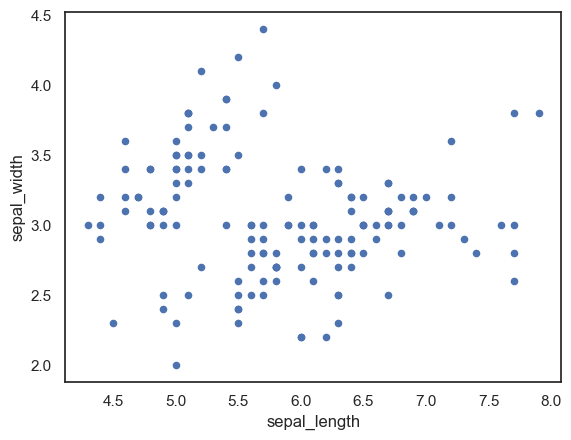

In [5]:
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

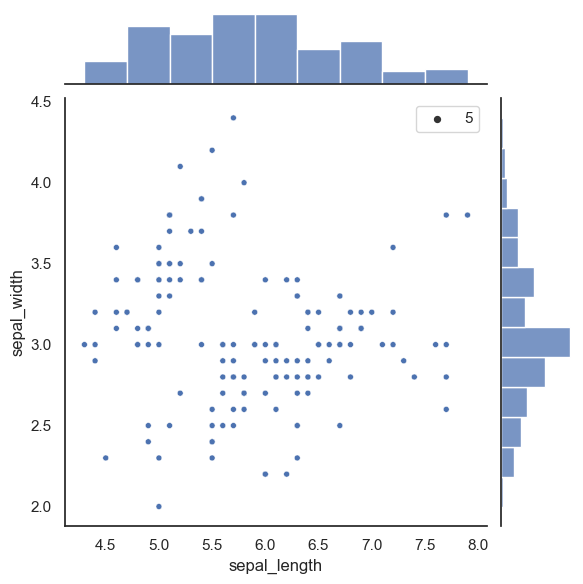

In [6]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

<Axes: xlabel='species', ylabel='petal_length'>

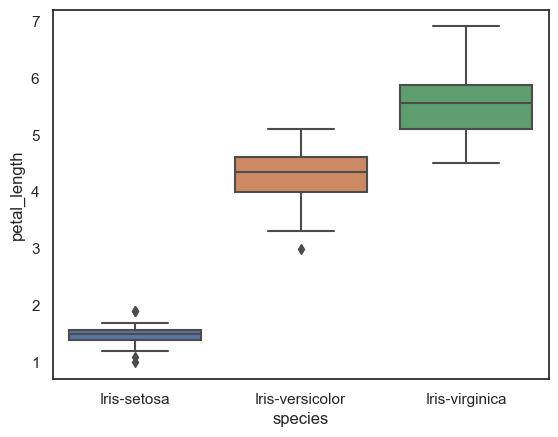

In [8]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris)

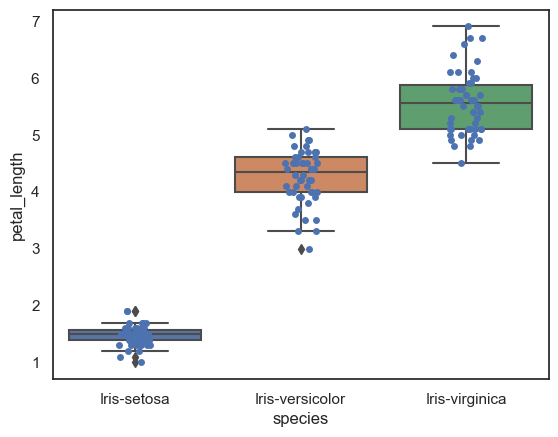

In [9]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

<Axes: xlabel='species', ylabel='petal_length'>

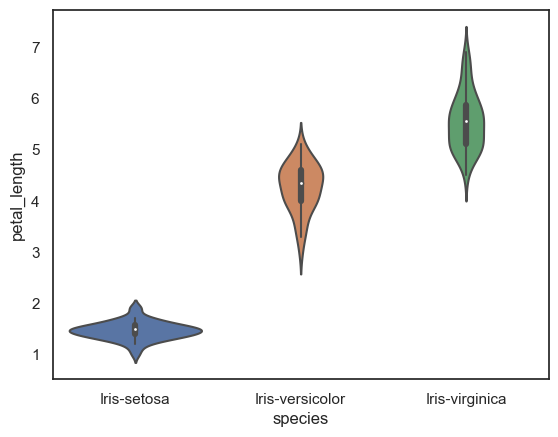

In [10]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

In [15]:
iris.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace = True)

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


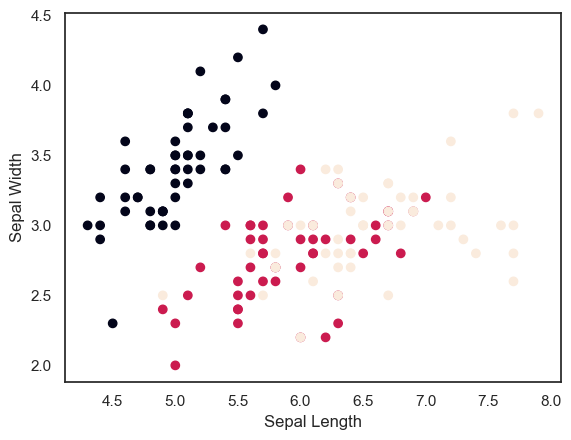

In [19]:
#Plotting Scatter plot for sepal_lenth  VS sepal_width
plt.scatter(x="sepal_length",y="sepal_width",data=iris,c=iris['species'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [21]:
X=iris.iloc[:,:4]
y=iris.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 100.00%


In [30]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [32]:
iris.replace({0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica"}, inplace = True)

In [33]:
new_sepal_length = 5.1
new_sepal_width = 3.5
new_petal_length = 1.4
new_petal_width = 0.2

In [35]:
new_data = [[new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]]
prediction = knn.predict(new_data)

print('Predicted Species: {}'.format(iris['species'][prediction[0]]))

Predicted Species: Iris-setosa
